# Importing neccessry liabrary

In [67]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [68]:
df_ff = pd.read_csv('forestfires.csv')
df_ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [69]:
df_ff.shape

(517, 31)

In [70]:
df_ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [71]:
# Drop 'month' and 'day'

df_ff.drop(["month","day"], axis=1, inplace=True)
df_ff.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [72]:
df_ff.isna().value_counts()

FFMC   DMC    DC     ISI    temp   RH     wind   rain   area   dayfri  daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category
False  False  False  False  False  False  False  False  False  False   False   False   False   False   False   False   False     False     False     False     False     False     False     False     False     False     False     False     False            517
dtype: int64

In [73]:
# Converting 'test categary' into 0 & 1 & comparing the different parameter with scatter plot

In [74]:
df_ff_copy=df_ff.copy()

In [75]:
df_ff_copy['size_category'].replace(to_replace=['small', 'large'], value=['0', '1'], inplace=True)
df_ff_copy

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


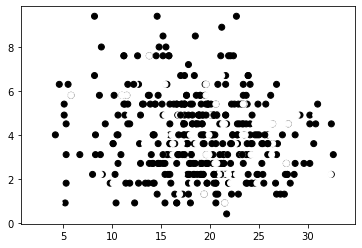

In [76]:
import matplotlib.pyplot as plt

plt.scatter(df_ff_copy["temp"],df_ff_copy["wind"],c=df_ff_copy["size_category"])

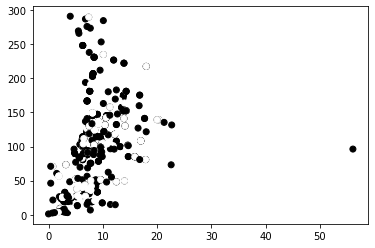

In [77]:
import matplotlib.pyplot as plt
plt.scatter(df_ff_copy["ISI"],df_ff_copy["DMC"],c=df_ff_copy["size_category"])

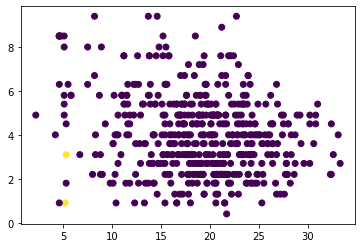

In [78]:
plt.scatter(df_ff["temp"],df_ff["wind"],c=df_ff["monthjan"])

## Converting data into feature & target variable

In [79]:
features = df_ff.iloc[:, 0:28]
target = df_ff.iloc[:, 28]

target.head()

0    small
1    small
2    small
3    small
4    small
Name: size_category, dtype: object

In [80]:
features.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
target.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [82]:
target, class_names = pd.factorize(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,

### Define min max scaler

In [83]:
scaler = preprocessing.MinMaxScaler()

# transform data

features = scaler.fit_transform(features)
features

array([[0.87096774, 0.08649207, 0.1013252 , ..., 0.        , 0.        ,
        0.        ],
       [0.92774194, 0.11819435, 0.77541926, ..., 0.        , 1.        ,
        0.        ],
       [0.92774194, 0.14679531, 0.79629412, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.8116129 , 0.19159201, 0.77131465, ..., 0.        , 0.        ,
        0.        ],
       [0.97677419, 0.49931082, 0.71162191, ..., 0.        , 0.        ,
        0.        ],
       [0.78451613, 0.00654721, 0.11586725, ..., 1.        , 0.        ,
        0.        ]])

### Build Support Vector Machine/Classifier

In [84]:
# Split into train and test

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [85]:
x_train.shape, y_train.shape, y_test.shape, y_test.shape

((361, 28), (361,), (156,), (156,))

#### y_train, unique class count

In [86]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  0   1]
 [265  96]]


## Grid search

In [87]:
clf = SVC(class_weight='balanced')

param_grid = [{'kernel':['rbf'], 'gamma':[50,5,10,0.5], 'C':[10,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf, param_grid, cv=10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'),
             param_grid=[{'C': [10, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [88]:
gsv.best_params_ , gsv.best_score_

({'C': 10, 'gamma': 50, 'kernel': 'rbf'}, 0.7314564564564565)

## SVC from grid search parameters

In [89]:
clf = SVC(kernel='rbf', C= 10, gamma = 50, class_weight='balanced')

clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy :", acc)
print('f1 score :', f1_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy : 71.15384615384616
f1 score : 0.2105263157894737


array([[105,   8],
       [ 37,   6]], dtype=int64)

In [90]:
# Ensemble technique, bagging with SVC model generated above

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold

seed = 7
kfold = KFold(n_splits=10)

num_trees = 50
model = BaggingClassifier(base_estimator=clf, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x_test, y_test, cv=kfold)

print(results.mean())

0.7050000000000001


## Prediction on test data

In [91]:
model.fit(x_train, y_train)

pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test, pred_test)

acc_test

0.7115384615384616